In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


In [2]:
current_directory = os.getcwd()

In [3]:
train_path = current_directory + "\\seg_train"
test_path = current_directory + "\\seg_test"
pred_path = current_directory + "\\seg_pred"

**Training Folder Analysis**

In [4]:
os.listdir(train_path + '\\seg_train')

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [5]:
print('Train Folders: \n')
for folder in os.listdir(train_path + '\\seg_train'):
    files = glob.glob(train_path + '\\seg_train/' + folder + '/*.jpg')
    print(f'{folder.capitalize()} : {len(files)} images')
    

Train Folders: 

Buildings : 2191 images
Forest : 2271 images
Glacier : 2404 images
Mountain : 2512 images
Sea : 2274 images
Street : 2382 images


In [6]:
train_image_size = []

for folder in os.listdir(train_path + '\\seg_train'):
    files = glob.glob(train_path + '\\seg_train/' + folder + '/*.jpg')
    for file in files:
        img = cv2.imread(file)
        train_image_size.append(img.shape)
train_image_shape = pd.Series(train_image_size).value_counts()
print(train_image_shape)

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(143, 150, 3)        2
(134, 150, 3)        2
(123, 150, 3)        2
(146, 150, 3)        2
(136, 150, 3)        2
(144, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(97, 150, 3)         1
(115, 150, 3)        1
(124, 150, 3)        1
(140, 150, 3)        1
(141, 150, 3)        1
(149, 150, 3)        1
(81, 150, 3)         1
(103, 150, 3)        1
(131, 150, 3)        1
(76, 150, 3)         1
(100, 150, 3)        1
(120, 150, 3)        1
(145, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(147, 150, 3)        1
(105, 150, 3)        1
(133, 150, 3)        1
(110, 150, 3)        1
dtype: int64


Majority of Image is in the size of 150 * 150 * 3.

**Test Folder Analysis**

In [7]:
print('Test Folder: \n')

test_image_size = []

for folder in os.listdir(test_path + '\\seg_test'):
    files = glob.glob(test_path + '\\seg_test/' + folder + '/*.jpg')
    print(f'{folder.capitalize()} : {len(files)} images')
    
    for file in files:
        img = cv2.imread(file)
        test_image_size.append(img.shape)
pd.Series(test_image_size).value_counts()


Test Folder: 

Buildings : 437 images
Forest : 474 images
Glacier : 553 images
Mountain : 525 images
Sea : 510 images
Street : 501 images


(150, 150, 3)    2993
(81, 150, 3)        1
(76, 150, 3)        1
(72, 150, 3)        1
(131, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(141, 150, 3)       1
dtype: int64

**Predcition Folder Analysis**

In [8]:
files = glob.glob(pred_path + '\\seg_pred/' + '/*.jpg')
print('Prediction folder Images: ', len(files))

Prediction folder Images:  7301


From the analysis of folders of Train, Test and Prediction, we can see that majority of image is in size of **150 X 150 X 3**.

In [9]:
categorical_dict = {'buildings': 0, 
                    'forest': 1,
                    'glacier': 2,
                    'mountain': 3,
                    'sea': 4,
                    'street': 5}
categorical_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [10]:
image_size = 100

x_train = []
y_train = []

for folder in os.listdir(train_path + "\\seg_train"):
    files = glob.glob(train_path + "\\seg_train/" + folder + "/*.jpg")
    for file in files:
        img = cv2.imread(file)
        new_image_size = cv2.resize(img, (image_size, image_size))
        x_train.append(list(new_image_size))
        y_train.append(categorical_dict[folder])

print(f"X_train: {len(x_train)} , y_train: {len(y_train)}")


X_train: 14034 , y_train: 14034


In [11]:
def getcode(n) : 
    for x , y in categorical_dict.items() : 
        if n == y : 
            return x 

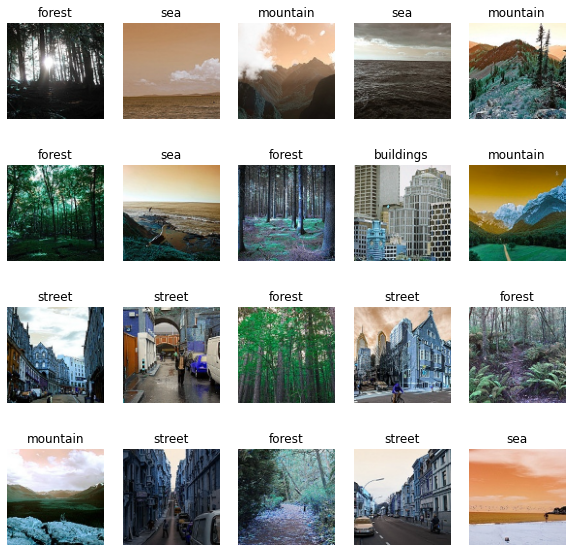

In [12]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(x_train),20))) : 
    plt.subplot(4,5,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

x_test: 3000, y_test: 3000


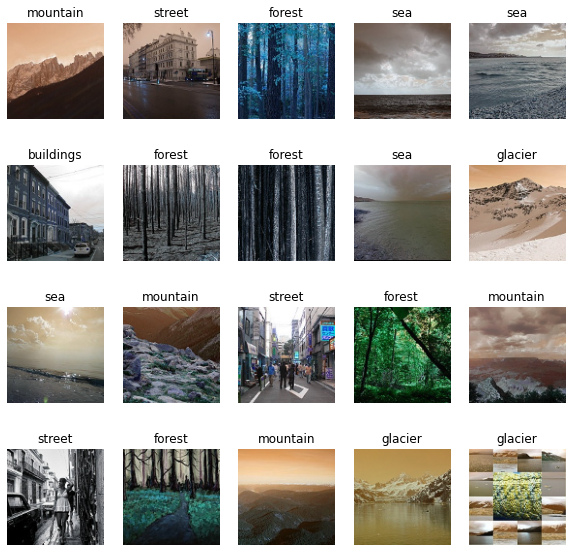

In [13]:
x_test = []
y_test = []

for folder in os.listdir(test_path + "\\seg_test"):
    files = glob.glob(test_path + "\\seg_test/" + folder + "/*.jpg")
    for file in files:
        img = cv2.imread(file)
        new_image_size = cv2.resize(img, (image_size, image_size))
        x_test.append(list(new_image_size))
        y_test.append(categorical_dict[folder])
        
print(f'x_test: {len(x_test)}, y_test: {len(y_test)}')

plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(x_test),20))) : 
    plt.subplot(4,5,n+1)
    plt.imshow(x_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

x_pred: 7301


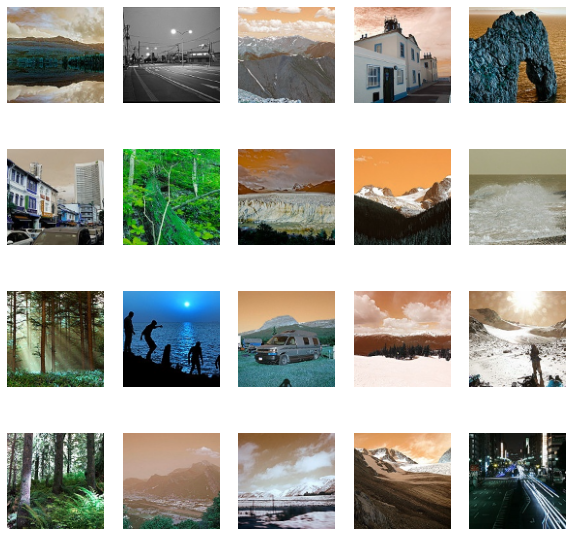

In [14]:
x_pred = []

files = glob.glob(pred_path + "\\seg_pred/*.jpg")
for file in files:
    img = cv2.imread(file)
    new_image_size = cv2.resize(img, (image_size, image_size))
    x_pred.append(list(new_image_size))
    
print(f'x_pred: {len(x_pred)}')

plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),20))) : 
    plt.subplot(4,5,n+1)
    plt.imshow(x_pred[i])    
    plt.axis('off')

In [15]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_pred = np.array(x_pred)

print('Shapes \n')
print(f'x_train shape: {x_train.shape}')
print(f'y_train.shape: {y_train.shape}')

print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)
print('x_pred shape: ', x_pred.shape)



Shapes 

x_train shape: (14034, 100, 100, 3)
y_train.shape: (14034,)
x_test shape:  (3000, 100, 100, 3)
y_test shape:  (3000,)
x_pred shape:  (7301, 100, 100, 3)


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

**Convolutional Neural Network**

In [17]:
resnet_model = tf.keras.models.Sequential()

pretrained_model= tf.keras.applications.ResNet50(
                   include_top=False,
                   input_shape=(image_size,image_size,3),
                   pooling='avg',
                   classes=6,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation='relu'))
tf.keras.layers.Dropout(rate=0.25) 
resnet_model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [18]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
resnet_model.compile(metrics= ['accuracy'],
              optimizer= tf.keras.optimizers.Adam(lr = 0.001),
              loss = 'sparse_categorical_crossentropy')

C:\Users\Inbarasan Mani\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [20]:
x_train.shape

(14034, 100, 100, 3)

In [21]:
history = resnet_model.fit(x_train, y_train, epochs=10)

Epoch 1/10


In [ ]:
report = pd.DataFrame(history.history)
report

In [ ]:
report.plot()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
loss, accuracy = resnet_model.evaluate(x_test, y_test)

print('Loss: ', loss)
print('Accuracy: ', accuracy)

y_pred = resnet_model.predict(x_test)
print('Prediction Shape: ', y_pred.shape)



In [ ]:
y_result= resnet_model.predict(x_pred_array)
print(y_result.shape)


In [ ]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),20))) : 
    plt.subplot(4,5,n+1)
    plt.imshow(x_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))